#### Experimenting on some basic optimization tools - Housing -data

These tools allow use to remove most obvious outliers but also study which variables are most important regarding the target variable in your dataset. For example, if you want to decide which variables to keep and which to drop in order to optimize the dataset.

In [1]:
# usual imports
# pip install scikit-learn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics

In [2]:
# load the data 
df = pd.read_csv("Housing.csv")

In [3]:
# WITH BOOLEAN TEXT VALUES => LabelEncoder is the best option
# since we can convert all of the boolean variables all at once
# any text column with exactly two options is considered a boolean

# this just converts the value of column to 0 or 1
# factorize in pandas works too, but only one column at a time
from sklearn.preprocessing import LabelEncoder

# list of all boolean variables we want to convert
variables = ['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 'prefarea']

# initalize encoder and convert everything
encoder = LabelEncoder()
df[variables] = df[variables].apply(encoder.fit_transform)

In [4]:
# this makes multiple columns with the variable (Separate for yes/no)
from sklearn.preprocessing import OneHotEncoder
variables = ['furnishingstatus']

# use encoder
encoder = OneHotEncoder(sparse_output=False).set_output(transform="pandas")
one_hot_encoded = encoder.fit_transform(df[variables]).astype(int)
df = pd.concat([df,one_hot_encoded],axis=1).drop(columns=variables)

In [5]:
# see the materials (Rovaniemi/Oulu/Helsinki), we can make a small optimization
# => remove the last new boolean variable (since it's going to be represented
# by a straight line of zeroes)
df = df.drop("furnishingstatus_unfurnished", axis=1)

In [6]:
df.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
0,13300000,7420,4,2,3,1,0,0,0,1,2,1,1,0
1,12250000,8960,4,4,4,1,0,0,0,1,3,0,1,0
2,12250000,9960,3,2,2,1,0,1,0,0,2,1,0,1
3,12215000,7500,4,2,2,1,0,1,0,1,3,1,1,0
4,11410000,7420,4,1,2,1,1,1,0,1,2,0,1,0


#### Outlier removal - basic tools

In [7]:
# for quantiles, see: https://www.scribbr.com/statistics/quartiles-quantiles/
# with quantiles, we can filter out extreme values on either side of the dataset
# if we have too much data on the left => use the left quantile, and vice versa
# in many cases, we can push our target distribution closer towards a normal distribution
# this way! (many ML algorithms expect a normal distribution for optimal performance)

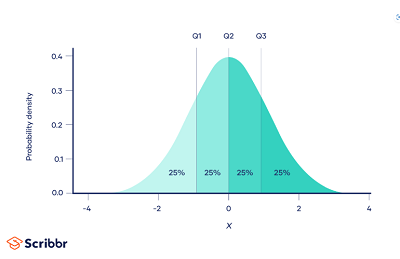

<Axes: xlabel='price', ylabel='Count'>

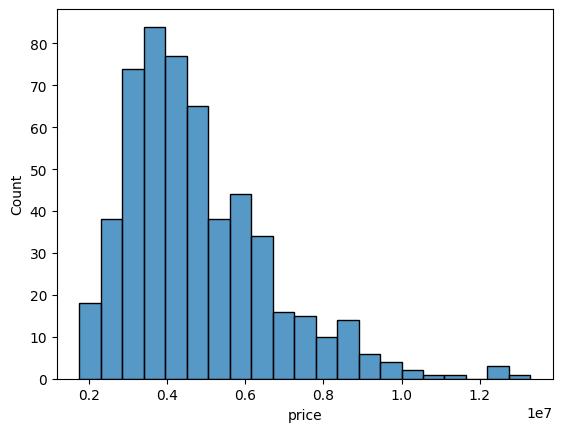

In [8]:
# let's see the current price distribution
sns.histplot(df['price'])

In [9]:
# let's use quantiles to remove the top % in order to get closer to normal distribution
df = df.query("price < price.quantile(0.92)")

<Axes: xlabel='price', ylabel='Count'>

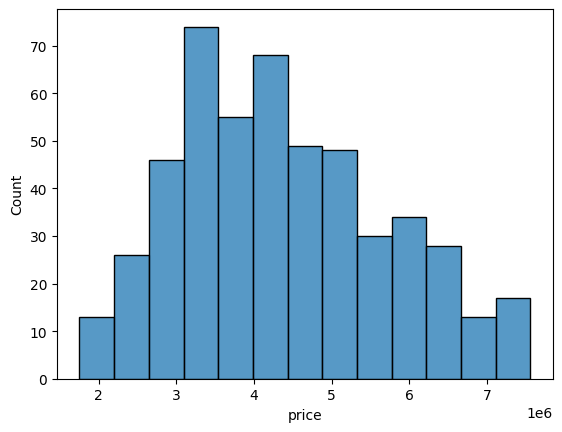

In [10]:
# how's the distribution now
sns.histplot(df['price'])

In [11]:
# we have only ~ 500 houses, better be careful when removing outliers!
df.describe()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus_furnished,furnishingstatus_semi-furnished
count,5.010000e+02,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000,501.000000
mean,4.382140e+06,4969.477046,2.916168,1.231537,1.736527,0.846307,0.165669,0.341317,0.039920,0.279441,0.620758,0.217565,0.239521,0.423154
std,1.345963e+06,2076.431007,0.727295,0.445290,0.816360,0.361014,0.372155,0.474626,0.195967,0.449173,0.831798,0.413002,0.427218,0.494553
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,3.360000e+06,3510.000000,2.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.200000e+06,4400.000000,3.000000,1.000000,2.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,5.250000e+06,6040.000000,3.000000,1.000000,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,7.560000e+06,15600.000000,6.000000,3.000000,4.000000,1.000000,1.000000,1.000000,1.000000,1.000000,3.000000,1.000000,1.000000,1.000000


<Axes: >

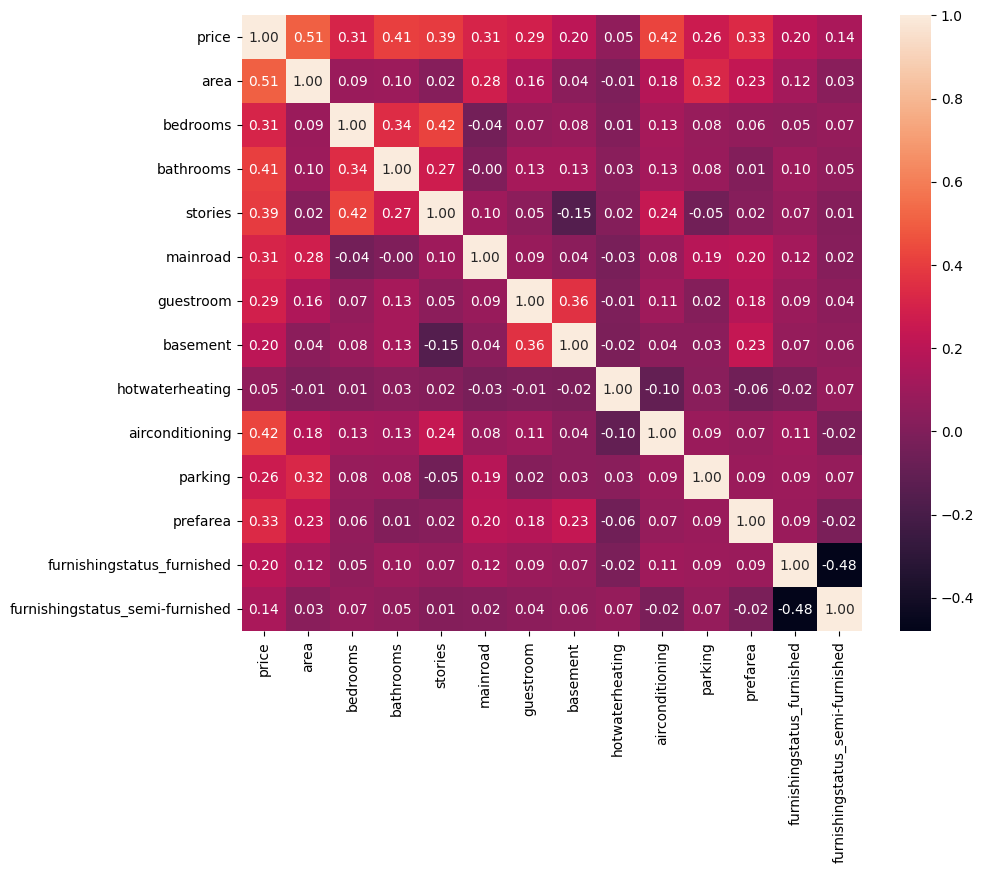

In [12]:
# Increase figure size
plt.figure(figsize=(10, 8))

# let's see the correlation matrix
# based on this, area is the most important support variable
correlations = df.corr(numeric_only=True)
sns.heatmap(correlations, annot=True, fmt='.2f')

<Axes: xlabel='area', ylabel='Count'>

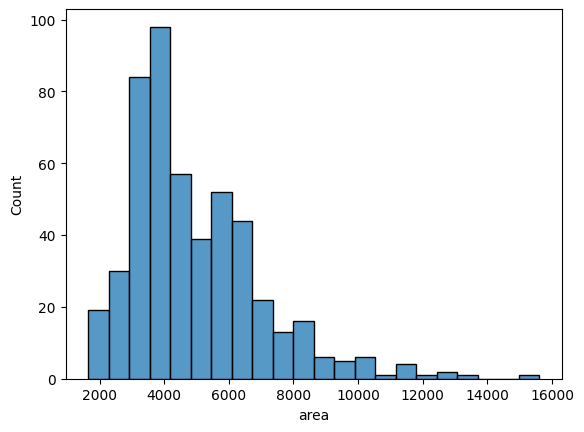

In [13]:
# let's check the area-variable too
sns.histplot(df['area'])

In [14]:
# let's filter also the area a bit
df = df.query("area < area.quantile(0.92)")

<Axes: xlabel='area', ylabel='Count'>

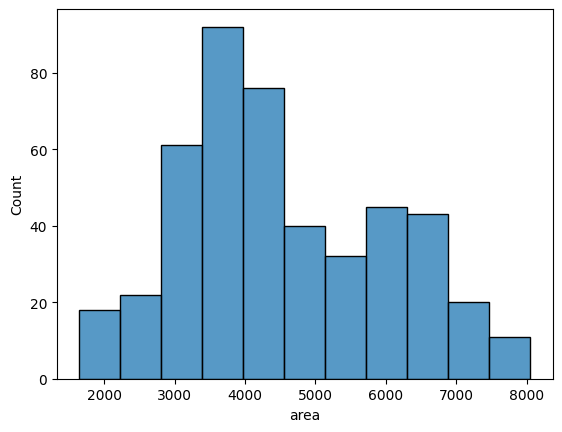

In [15]:
# let's check the area-variable too
sns.histplot(df['area'])

<Axes: xlabel='price', ylabel='Count'>

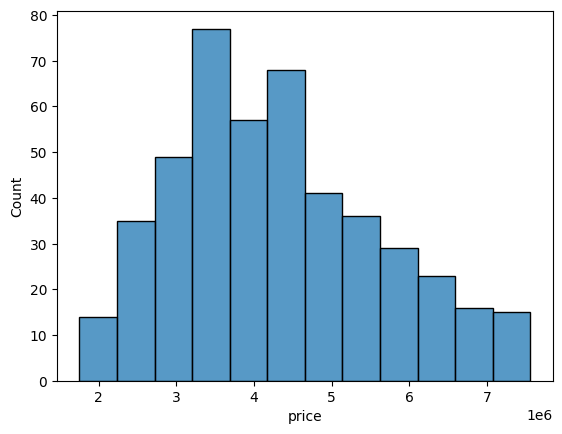

In [16]:
sns.histplot(df['price'])

In [17]:
# if you don't want to use quantiles, you can also do basic 
# pandas filtering (e.g. = df = df[df['price'] < 4000000]) etc.

In [18]:
# first, we split into X and y
# in other words, we split the dataset into support variables (X)
# and the target variable (y)

# X = list of all support variables you want to use
# while predicting the target variable with your model

# a small trick => use everything else except, the target
X = df.drop("price", axis=1)

# our target variable is y
y = df['price']

#### Selecting the most important variables in your dataset

The idea of these methods is to cross-reference between the tools and correlations in order to find variables that don't probably bring anything useful to the table from the point of view of the target variable. Any variable that is not relevant to the target variable => typically just noise that can be removed (and thus optimizing your model performance)

<Axes: >

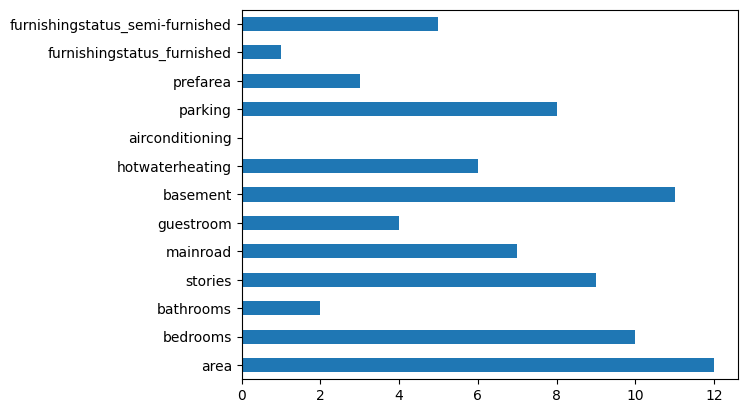

In [19]:
# Tool 1: Fisher's score
# pip install skfeature-chappers
from skfeature.function.similarity_based import fisher_score

# get the fisher's score rankings 
ranks = fisher_score.fisher_score(X.values, y.values)

# create a pandas DataFrame for easier interpretation
feat_importances = pd.Series(ranks, X.columns)
feat_importances.plot(kind='barh')

# how to interpret -> low score means the effect of this field is not large in the dataset
# => typically means other columns in the dataset have similar correlations, 
# therefore making this particular column not so useful since other columns 
# already fill this role for this correlation

# Fisher's score studies the variance of the data -> statistical significance

In [20]:
# Tool 2: SelectKBest -score
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

# convert all continuous variables to integer
X_cat = X.astype(int) 

# initialize chi2 and SelectKBest
# Note: chi2 -test is a very common test
# in statistics and quantitative analysis
# basically it studies the data whether variables are related
# or independent of each other
chi_2_features = SelectKBest(chi2, k=10)

# fit our data to the SelectKBest
best_features = chi_2_features.fit(X, y)

# wrap it up, and show the results
# the higher the score, the more effect that column has on price
df_features = pd.DataFrame(best_features.scores_)
df_columns = pd.DataFrame(X.columns)
f_scores = pd.concat([df_columns,df_features],axis=1)
f_scores.columns = ['Features','Score']
f_scores.sort_values(by='Score',ascending=False)

,Features,Score
0,area,113680.400457
9,parking,233.619217
5,guestroom,199.537401
10,prefarea,190.459285
8,airconditioning,170.486512
7,hotwaterheating,166.520222
11,furnishingstatus_furnished,149.089411
6,basement,142.737526
12,furnishingstatus_semi-furnished,119.892180
3,stories,89.579020
